In [20]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

In [90]:
df = pd.read_csv('../../Data/SAP_numeric.csv')

In [23]:
df.head()
print(df.shape)
df.isnull().sum()

(480, 18)


Unnamed: 0                  0
gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [75]:
x = df.iloc[:, [2,4,7,8,9,10,11,12,13,15,16]].values
x

array([[ 5,  2,  8, ..., 20,  2,  2],
       [ 5,  2,  8, ..., 25,  2,  2],
       [ 5,  2,  8, ..., 30,  1,  1],
       ...,
       [ 4,  3,  6, ..., 29,  1,  2],
       [ 4,  3,  7, ..., 57,  1,  1],
       [ 4,  3,  7, ..., 62,  1,  1]])

In [76]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans5.fit_predict(x)

kmeans5.cluster_centers_

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

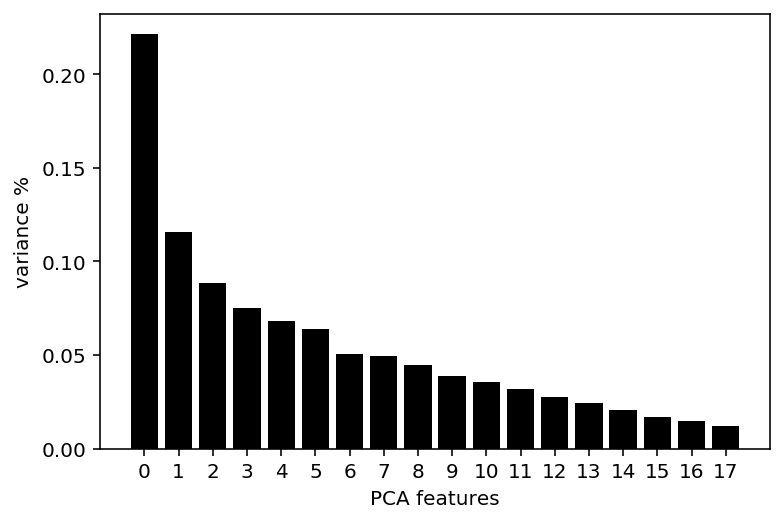

In [84]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'# Load in the data
df = pd.read_csv('../../Data/SAP_numeric.csv')# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)# Create a PCA instance: pca
pca = PCA(n_components=18)
principalComponents = pca.fit_transform(X_std)# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

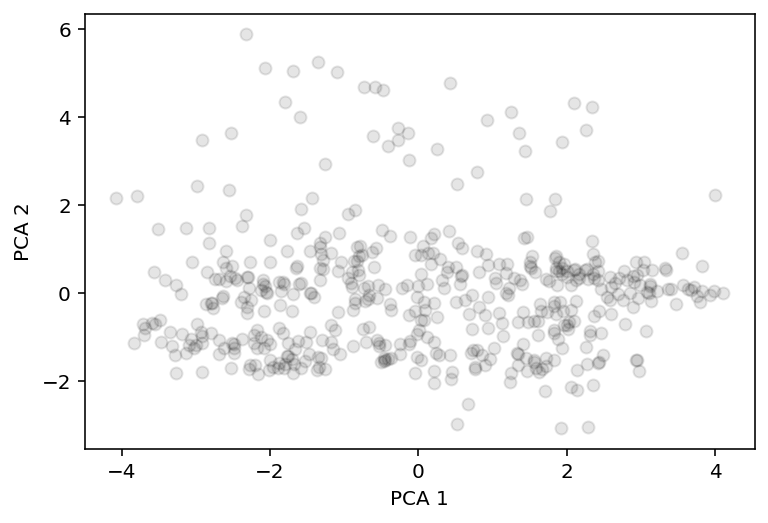

In [89]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')


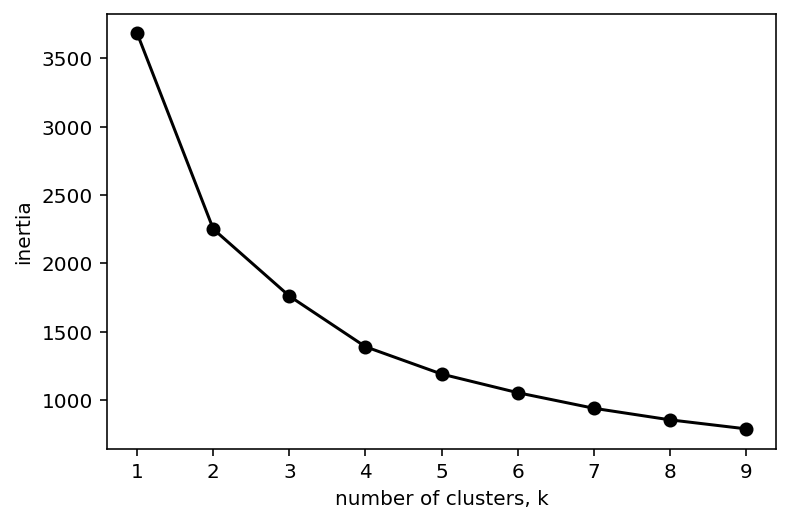

In [92]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [97]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(PCA_components)

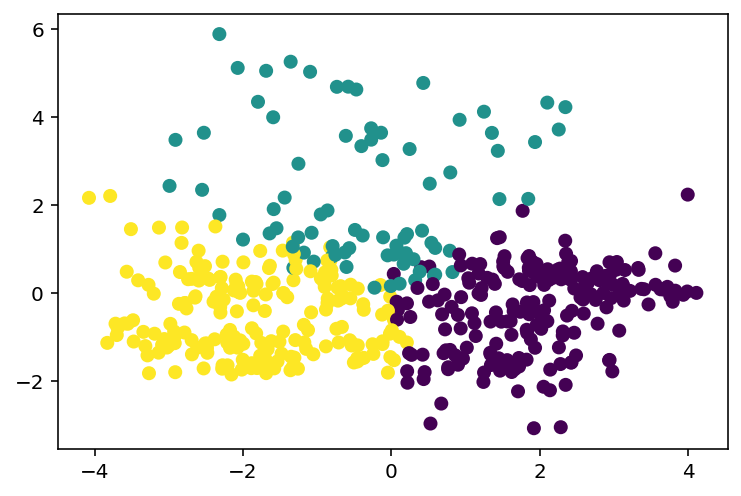

In [98]:
plt.scatter(PCA_components[0], PCA_components[1],c=y_kmeans3)

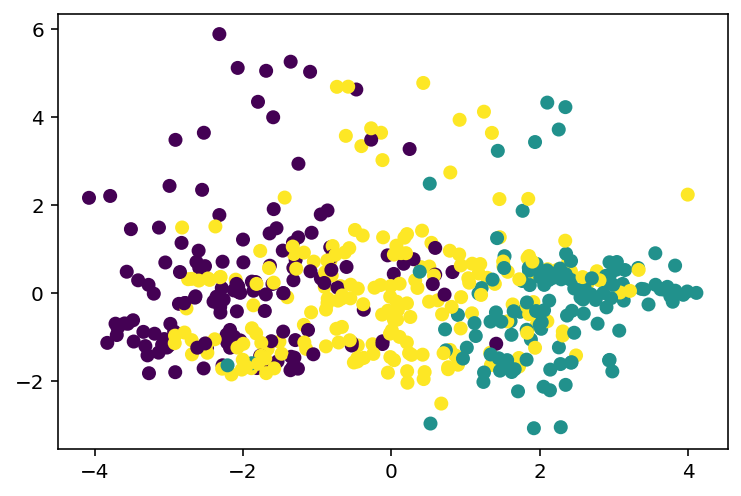

In [104]:
plt.scatter(PCA_components[0], PCA_components[1],c=df["Class"])


In [103]:
df["Class"]

0      3
1      3
2      2
3      2
4      3
      ..
475    2
476    3
477    3
478    2
479    2
Name: Class, Length: 480, dtype: int64